In [15]:
%reset -f
%load_ext autoreload
%autoreload 2

import random as rand
import copy 
import numpy as np
import matplotlib.pyplot as plt
import Proj5 as metah
import plot_tsp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
#inputs
rand.seed(123)
np.random.seed(123)

rand_Dist_File = 'TSP_Rand_25_dist.csv'
rand_Coords_File = 'TSP_Rand_25_coords.csv'

circ_Dist_File = 'TSP_Circle_50_dist.csv'
circ_Coords_File = 'TSP_Circle_50_coords.csv'

# VNS, LS, SA
count_limit = 50000 #max number of iterationsbefore stopping (stopping condition)
fail_limit = 1000 # number of times a neighborhood can fail the generate a better solution before changing neigborhoods
Temp = 100 #temperature value for Simulated annealing

#GA
count_limit2 = 1000 #max number of iterations before stopping (stopping condition)
num_chromosomes = 50 #population size in GA - must be an even number

# PS
num_particles = 50 #number of points in particle swarm
weights = np.array([1,1,1]) #weights are w, c1 and c2
count_limit3 = 1000 #max number of iterations before stopping (stopping condition)

#load data
D_rand = np.genfromtxt(rand_Dist_File, delimiter=',')
D_circ = np.genfromtxt(circ_Dist_File, delimiter=',')
#inital tour is starting at city 0 and moving to city 1, city 1 to city 2 and so on
rand_initial_tour = np.arange(D_rand.shape[0],dtype=int)
rand_initial_tour = np.random.permutation(rand_initial_tour)

circ_initial_tour = np.arange(D_circ.shape[0],dtype=int)
circ_initial_tour = np.random.permutation(circ_initial_tour)

# Greedy Search (Lower bound estimation)

estimated lower bound 917.8820971672781
[0, 23, 17, 13, 1, 12, 2, 6, 8, 16, 19, 11, 15, 21, 4, 9, 5, 14, 3, 10, 20, 24, 22, 18, 7]


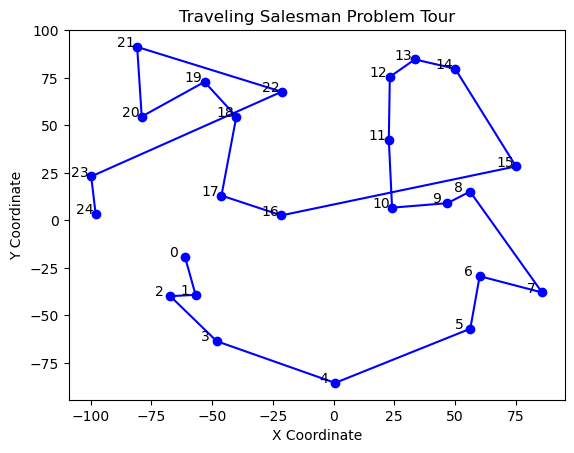

estimated lower bound 615.3470913872713
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


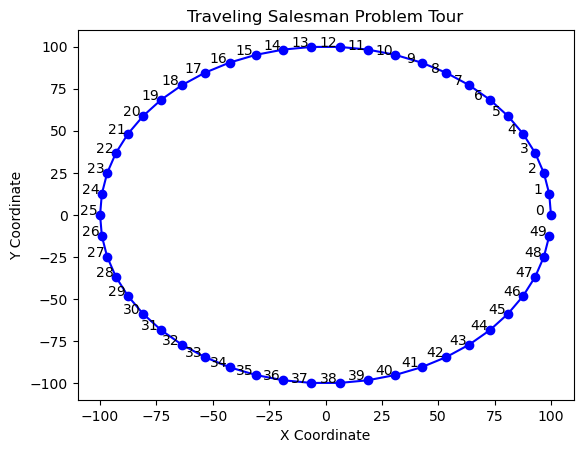

In [17]:
est, v= metah.EstimateLowerBound(D_rand)
print('estimated lower bound',v)
plot_tsp.plot_tsp_solution(rand_Coords_File,est)

est, v= metah.EstimateLowerBound(D_circ)
print('estimated lower bound',v)
plot_tsp.plot_tsp_solution(circ_Coords_File,est)

# Variable Neighborhood Search (VNS)


-----------------------------------------------------------
Variable Neighborhood Search
-----------------------------------------------------------

The inital tour and distance is: 

[ 5 21 22 18 15  8  7 11  4  3 24 12 16  9 14 20  0  1 10 19 17  6 23  2
 13]
2466.979345903165

-----------------------------------------------------------

50001 objective evaluations occured 

The final tour and distance for Variable Neighborhood Search is: 

[ 7 18 20 24 10  3 22 11 15 21  4  9  8 16 19  5 14  0 17 23 13  1 12  2
  6]
738.849212151739

-----------------------------------------------------------

[7, 18, 20, 24, 10, 3, 22, 11, 15, 21, 4, 9, 8, 16, 19, 5, 14, 0, 17, 23, 13, 1, 12, 2, 6]


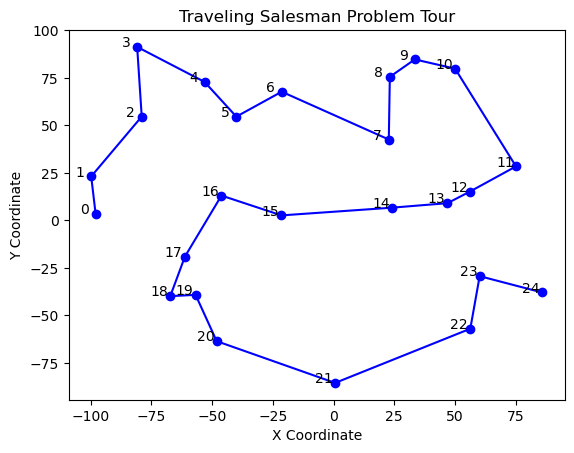

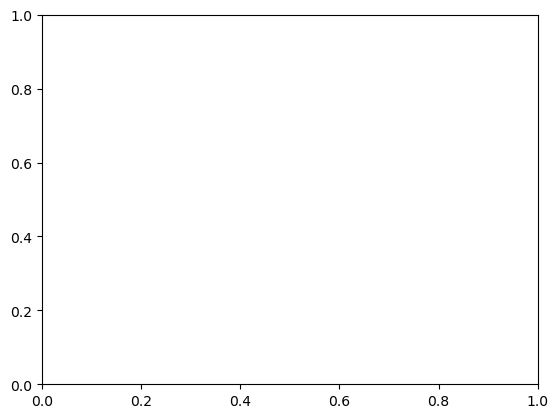

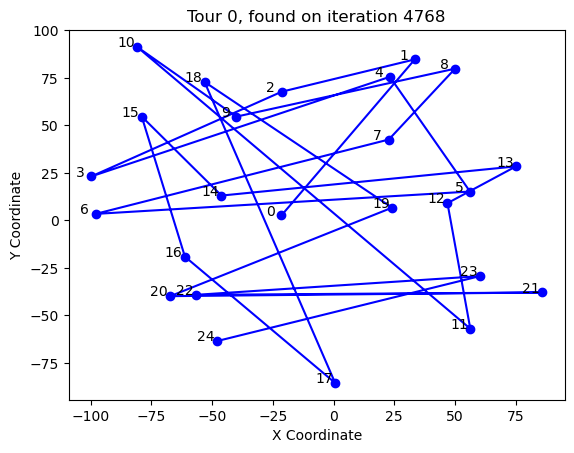

In [20]:
# rand VNS
best_tour, best_solution, [best_tours, itrs] = metah.Variable_Neighborhood_Search(D_rand,rand_initial_tour,fail_limit, count_limit)
plot_tsp.plot_tsp_solution(rand_Coords_File,best_tour)

plot_tsp.animated_plot(rand_Coords_File, best_tours,itrs,'tsp_VNS25_rand.mp4')



-----------------------------------------------------------
Variable Neighborhood Search
-----------------------------------------------------------

The inital tour and distance is: 

[ 8 37 40 32 23 49  9 43 36  1 25 17 42 46 24 14 19 16 29  6 47 44 31 15
  4 18 13 22 10 26 48 11  0  5  3 12 45 34 27 30 21 33 38 28 35 41  7 20
  2 39]
5999.317334912759

-----------------------------------------------------------

50001 objective evaluations occured 

The final tour and distance for Variable Neighborhood Search is: 

[ 2  1  0 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29
 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5
  4  3]
615.3470913872713

-----------------------------------------------------------

[2, 1, 0, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3]


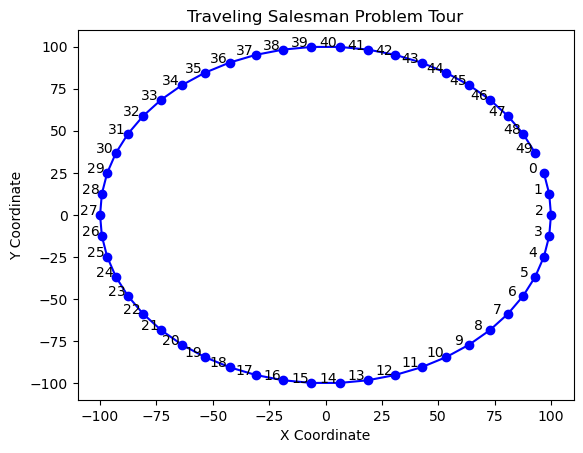

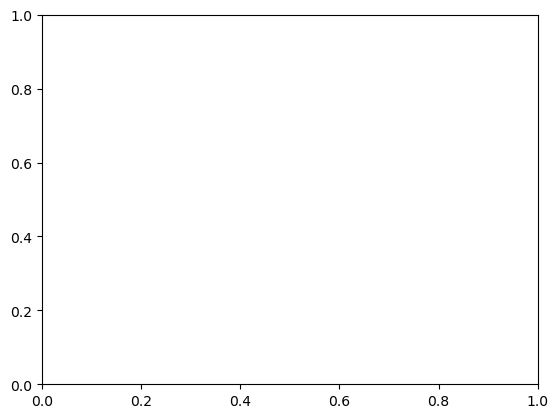

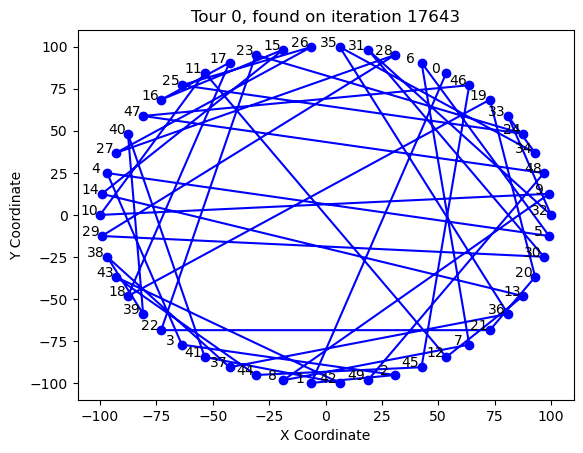

In [21]:
# circle VNS
best_tour, best_solution, [best_tours, itrs] = metah.Variable_Neighborhood_Search(D_circ,circ_initial_tour,fail_limit, count_limit)
plot_tsp.plot_tsp_solution(circ_Coords_File,best_tour)

plot_tsp.animated_plot(circ_Coords_File, best_tours,itrs,'tsp_VNS50_circ.mp4')



# Genetic Algorithm (GA)


-----------------------------------------------------------

Genetic Algorithm

-----------------------------------------------------------

1000 iterations were performed

With population size of 50

The final tour for GA is: 

[ 5. 14.  3. 22. 10. 24. 20. 18.  7.  0. 17. 23. 13.  1. 12.  6.  2. 16.
 19. 11. 15. 21.  4.  9.  8.]
The final distance for GA is: 774.3230209327165

[5, 14, 3, 22, 10, 24, 20, 18, 7, 0, 17, 23, 13, 1, 12, 6, 2, 16, 19, 11, 15, 21, 4, 9, 8]


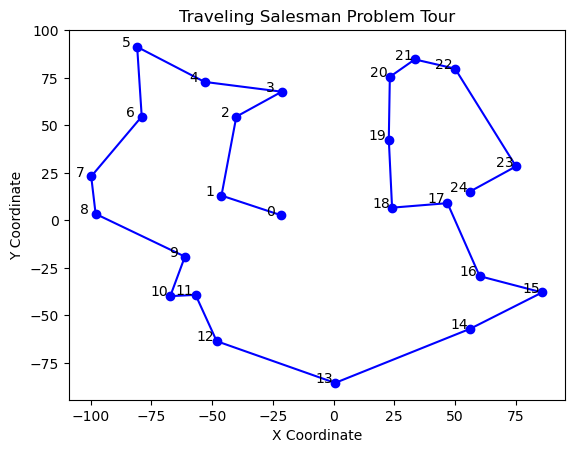

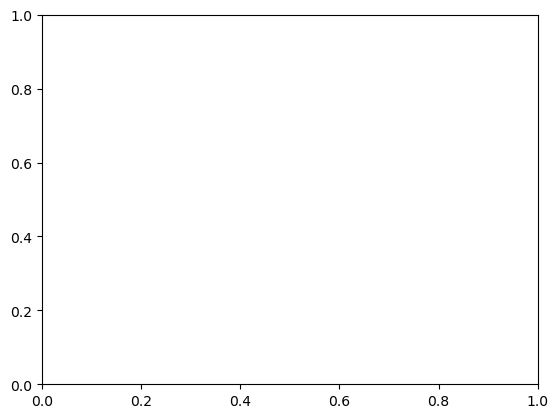

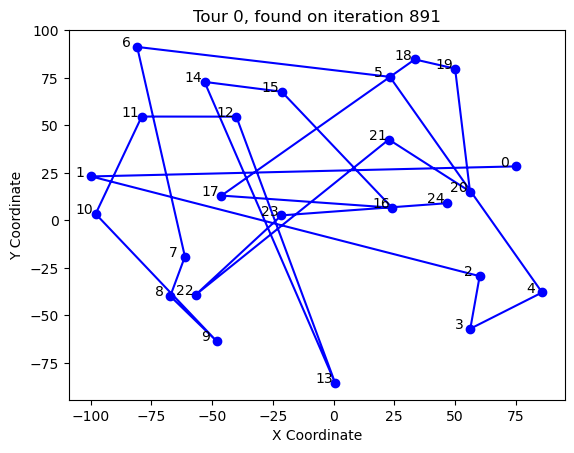

In [22]:
# rand GA
best_tour, best_solution, [best_tours, itrs] = metah.GA(D_rand,count_limit2, num_chromosomes)
plot_tsp.plot_tsp_solution(rand_Coords_File,best_tour)
plot_tsp.animated_plot(rand_Coords_File, best_tours,itrs,'tsp_GA25_circ.mp4')


-----------------------------------------------------------

Genetic Algorithm

-----------------------------------------------------------

1000 iterations were performed

With population size of 50

The final tour for GA is: 

[26. 25. 24. 23. 22. 21. 20. 19. 18. 16. 17. 15. 14. 13. 12. 11. 10.  9.
  6.  5.  4.  3.  2.  1.  8.  7.  0. 49. 48. 46. 47. 45. 44. 43. 42. 41.
 39. 38. 37. 36. 35. 34. 33. 32. 31. 30. 27. 28. 29. 40.]
The final distance for GA is: 987.8483263030059

[26, 25, 24, 23, 22, 21, 20, 19, 18, 16, 17, 15, 14, 13, 12, 11, 10, 9, 6, 5, 4, 3, 2, 1, 8, 7, 0, 49, 48, 46, 47, 45, 44, 43, 42, 41, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 27, 28, 29, 40]


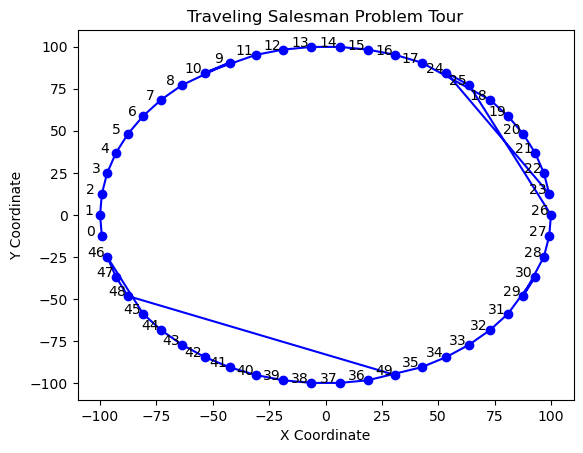

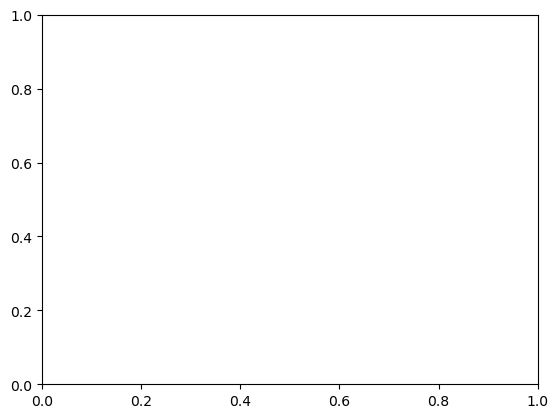

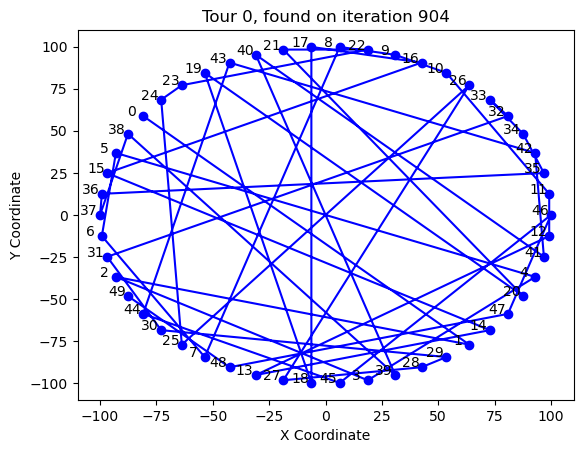

In [23]:
# circ GA
best_tour, best_solution, [best_tours, itrs] = metah.GA(D_circ,count_limit2, num_chromosomes)
plot_tsp.plot_tsp_solution(circ_Coords_File,best_tour)
plot_tsp.animated_plot(circ_Coords_File, best_tours,itrs,'tsp_GA50_circ.mp4')

# Simulated Annealing (SA)


-----------------------------------------------------------
Simulated Annealing
-----------------------------------------------------------

The inital tour and distance is: 

[ 5 21 22 18 15  8  7 11  4  3 24 12 16  9 14 20  0  1 10 19 17  6 23  2
 13]
2466.979345903165

-----------------------------------------------------------

The final tour for Simulated Annealing is: 

[ 3 20  7  4 21 18  0 13  5  9 19 16  8 11 15 22 24 10  1 17 14 23 12  6
  2]
The final distance for Simulated Annealing is: 1542.9139576986217


------------------------------------------------------------------

[3, 20, 7, 4, 21, 18, 0, 13, 5, 9, 19, 16, 8, 11, 15, 22, 24, 10, 1, 17, 14, 23, 12, 6, 2]


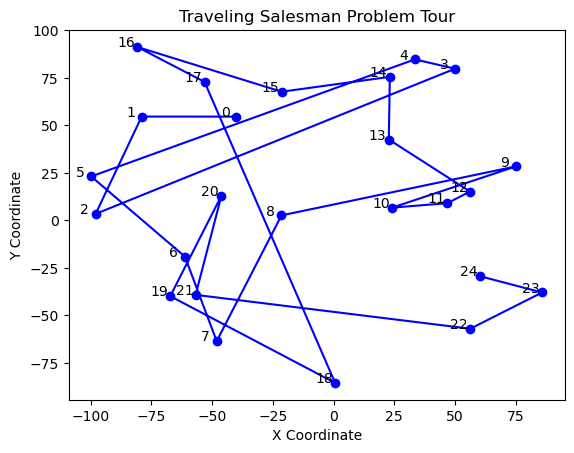

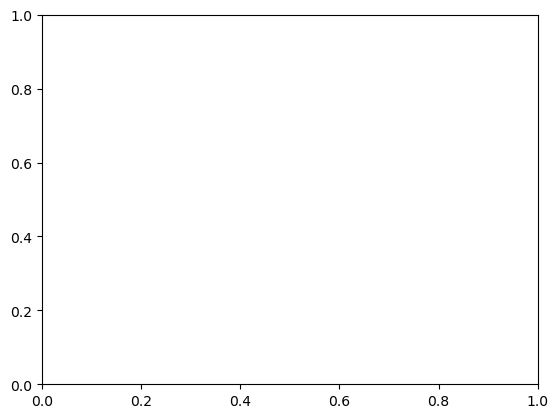

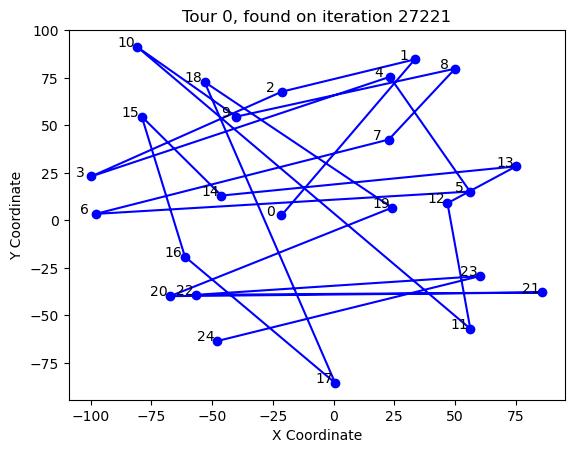

In [24]:
# rand SA
best_tour, best_solution, [best_tours, itrs] = metah.Simulated_Annealing(D_rand,rand_initial_tour, count_limit,Temp)
plot_tsp.plot_tsp_solution(rand_Coords_File,best_tour)
plot_tsp.animated_plot(rand_Coords_File, best_tours,itrs,'tsp_SA25_circ.mp4')


-----------------------------------------------------------
Simulated Annealing
-----------------------------------------------------------

The inital tour and distance is: 

[ 8 37 40 32 23 49  9 43 36  1 25 17 42 46 24 14 19 16 29  6 47 44 31 15
  4 18 13 22 10 26 48 11  0  5  3 12 45 34 27 30 21 33 38 28 35 41  7 20
  2 39]
5999.317334912759

-----------------------------------------------------------

The final tour for Simulated Annealing is: 

[ 4  7  2 13  3 46 43 30 27 22 31 24 25 12 21 15 19 17  5 39 37 35 29 23
 16 20 40 42 44 36 32 10 34 14 11 18 48  8  0 49 47 33 38 26 45 41 28  6
  1  9]
The final distance for Simulated Annealing is: 4582.344336583287


------------------------------------------------------------------

[4, 7, 2, 13, 3, 46, 43, 30, 27, 22, 31, 24, 25, 12, 21, 15, 19, 17, 5, 39, 37, 35, 29, 23, 16, 20, 40, 42, 44, 36, 32, 10, 34, 14, 11, 18, 48, 8, 0, 49, 47, 33, 38, 26, 45, 41, 28, 6, 1, 9]


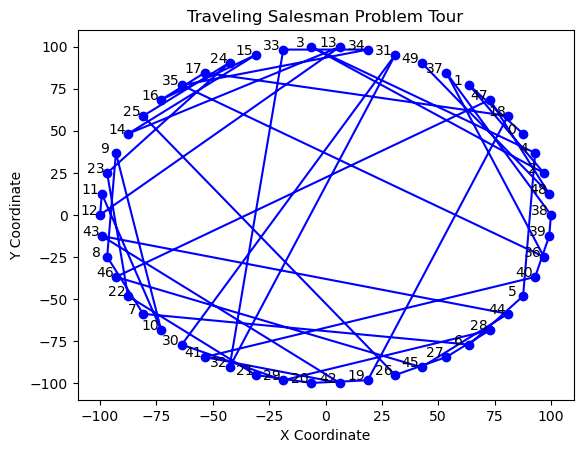

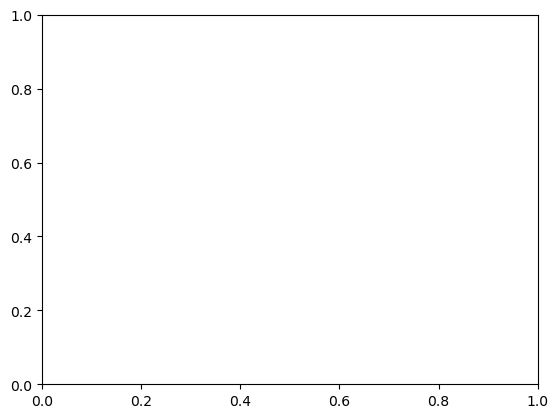

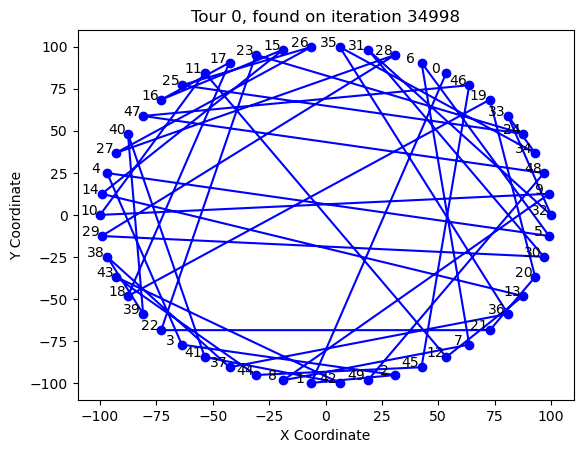

In [25]:
# circ SA
best_tour, best_solution, [best_tours, itrs] = metah.Simulated_Annealing(D_circ,circ_initial_tour, count_limit,Temp)
plot_tsp.plot_tsp_solution(circ_Coords_File,best_tour)
plot_tsp.animated_plot(circ_Coords_File, best_tours,itrs,'tsp_SA50_circ.mp4')

# Local Search (LS)


-----------------------------------------------------------
Local Search
-----------------------------------------------------------

The inital tour and distance is: 

[ 5 21 22 18 15  8  7 11  4  3 24 12 16  9 14 20  0  1 10 19 17  6 23  2
 13]
2466.979345903165

-----------------------------------------------------------

0 swaps total

The final tour for local search is: 

[13  1 19 16  8  9  4 21 15  3 14  5  0 23 17  7 18 20 24 10 22 11  2  6
 12]
The final tour distance for local search is: 912.4150526360703


-----------------------------------------------------------



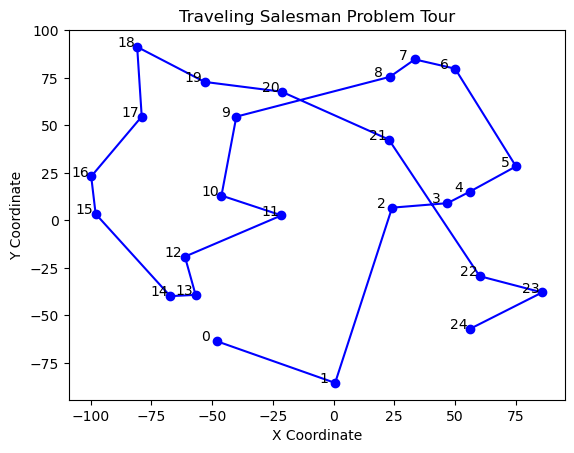

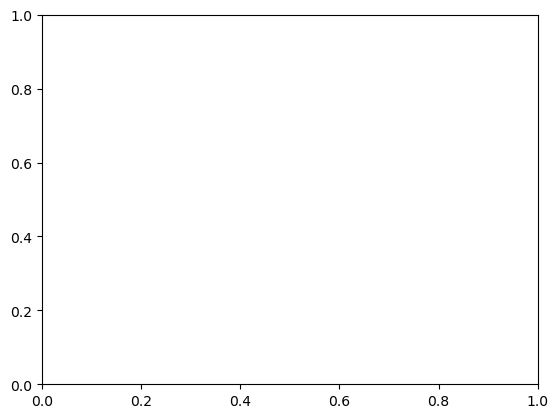

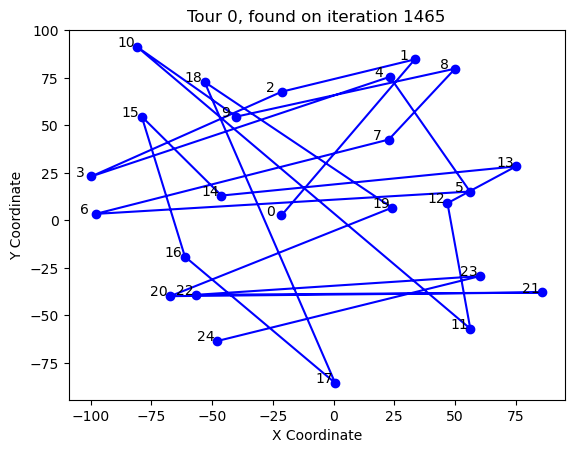

In [27]:
# rand LS
best_tour, best_solution, [best_tours, itrs] = metah.Local_Search(D_rand,rand_initial_tour, count_limit)
plot_tsp.plot_tsp_solution(rand_Coords_File,best_tour)
plot_tsp.animated_plot(rand_Coords_File, best_tours,itrs,'tsp_LS25_circ.mp4')

In [28]:
# circ LS
best_tour, best_solution, [best_tours, itrs] = metah.Local_Search(D_circ,circ_initial_tour, count_limit)
plot_tsp.plot_tsp_solution(circ_Coords_File,best_tour)
plot_tsp.animated_plot(circ_Coords_File, best_tours,itrs,'tsp_LS50_circ.mp4')


-----------------------------------------------------------
Local Search
-----------------------------------------------------------

The inital tour and distance is: 



IndexError: index 61 is out of bounds for axis 0 with size 50

# Particle Swarm (PS)

In [ ]:
# rand PS
best_tour, best_solution, [best_tours, itrs] = metah.Particle_Swarm(D_rand,count_limit3, weights, num_particles,rand_initial_tour)
plot_tsp.plot_tsp_solution(rand_Coords_File,best_tour)
plot_tsp.animated_plot(rand_Coords_File, best_tours,itrs,'tsp_PS25_circ.mp4')

In [ ]:
# circ PS
best_tour, best_solution, [best_tours, itrs] = metah.Particle_Swarm(D_circ,count_limit3, weights, num_particles,circ_initial_tour)
plot_tsp.plot_tsp_solution(circ_Coords_File,best_tour)
plot_tsp.animated_plot(circ_Coords_File, best_tours,itrs,'tsp_PS50_circ.mp4')